# Exploratory Script

This script has been used to analyse the composition of the networks as a whole and at different points in time, to identify the main nodes and understand the architecture of the french media system. As such, in some occasions, we used each cell multiple times, changing key parameters to investigate the composition of different communities and political leanings.

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
from ural import get_domain_name
import seaborn as sn
import networkx as nx

We import four datasets: 
- the medias_metadata : this contains the characteristics of media outlets defined in Cointet et al. (2021).
- CLIM and IMM nodes gephi stats : which contain the main descriptive statistics for the nodes belonging to the immigration and climate debates. 
- media leanings: which contains the audience mean leanings of each french media outlet across a number of CHES dimensions.

In [136]:
meta_media = pd.read_csv('/.../medias_metadata.csv') 

In [175]:
clim = pd.read_csv('/.../CLIM_nodes_gephi_stats.csv')
imm = pd.read_csv('/.../IMM_nodes_gephi_stats.csv')
leanings= pd.read_csv('/.../0_FR_media_leanings.csv')

Map the media leanings on the clim and imm datasets to investigate them.

In [176]:
clim['LR_quintile'] = clim['Label'].map(leanings.set_index('domain')['LR_quintile'])
clim['leaning'] = clim['Label'].map(leanings.set_index('domain')['leaning'])
clim['audience_mean_lr']= clim['Label'].map(leanings.set_index('domain')['audience_mean_lr'])
clim['audience_mean_antielite']= clim['Label'].map(leanings.set_index('domain')['audience_mean_antielite'])
clim['audience_mean_eu']= clim['Label'].map(leanings.set_index('domain')['audience_mean_eu'])
clim['audience_mean_nationalism']= clim['Label'].map(leanings.set_index('domain')['audience_mean_nationalism'])

imm['LR_quintile'] = imm['Label'].map(leanings.set_index('domain')['LR_quintile'])
imm['leaning'] = imm['Label'].map(leanings.set_index('domain')['leaning'])
imm['audience_mean_lr']= imm['Label'].map(leanings.set_index('domain')['audience_mean_lr'])
imm['audience_mean_antielite']= imm['Label'].map(leanings.set_index('domain')['audience_mean_antielite'])
imm['audience_mean_eu']= imm['Label'].map(leanings.set_index('domain')['audience_mean_eu'])
imm['audience_mean_nationalism']= imm['Label'].map(leanings.set_index('domain')['audience_mean_nationalism'])

In [21]:
imm.to_csv('IMM_nodeslist_leanings.csv', index=False)
clim.to_csv('CLIM_nodeslist_leanings.csv', index=False)

Prep the meta_media dataframe by derifing the domain name that we use to map the 'wheel_category' column onto our clim and imm dataset. This grants us access to the information dervived from the Cointet et al. (2021) paper which, among other things, categorieses media entities into different 'type' or 'categories'

In [177]:
meta_media['domain'] = meta_media['home_page'].apply(get_domain_name)

In [178]:
meta_media.drop_duplicates('domain',inplace=True)

In [179]:
imm['media_type'] = imm.Label.map(meta_media.set_index('domain')['wheel_category'])
clim['media_type'] = clim.Label.map(meta_media.set_index('domain')['wheel_category'])

# Main nodes and distribution

Here we plot the density distribution of the nodes on the basis of the left-right leaning of the ches scale and their pageranks to investigate which political leaning dominates the network. 

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_13289/3124419813.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(data=imm, x="audience_mean_lr", y="pageranks", ax=axes[0], cmap="Blues", shade=True)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_13289/3124419813.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(data=clim, x="audience_mean_lr", y="pageranks", ax=axes[1], cmap="Blues", shade=True)


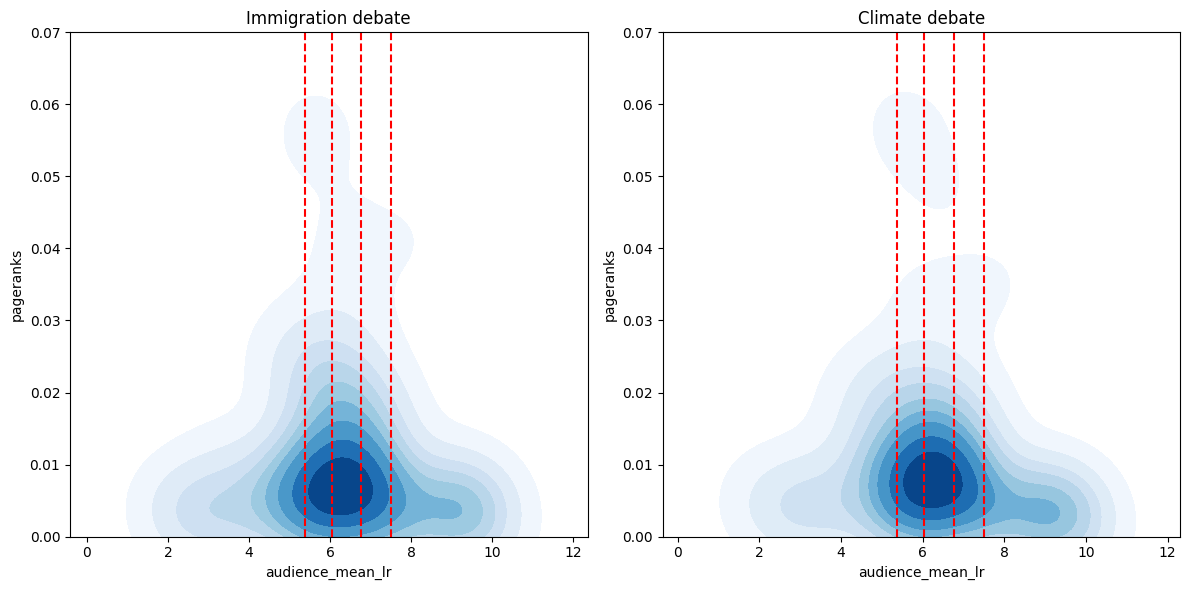

In [207]:
cutoffs = [max(imm[imm['LR_quintile'] == 0]['audience_mean_lr']),
    max(imm[imm['LR_quintile'] == 1]['audience_mean_lr']),
          max(imm[imm['LR_quintile'] == 2]['audience_mean_lr']),
          max(imm[imm['LR_quintile'] == 3]['audience_mean_lr'])]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sn.kdeplot(data=imm, x="audience_mean_lr", y="pageranks", ax=axes[0], cmap="Blues", shade=True)
axes[0].set_title('Immigration debate')
axes[0].set_ylim(0,0.07)

sn.kdeplot(data=clim, x="audience_mean_lr", y="pageranks", ax=axes[1], cmap="Blues", shade=True)
axes[1].set_title('Climate debate')
axes[1].set_ylim(0,0.07)

for point in cutoffs:
    axes[0].axvline(x=point, color='r', linestyle='--')
    axes[1].axvline(x=point, color='r', linestyle='--')

plt.tight_layout()
plt.show()

Investivate top 25 nodes for immigration and climate on the basis of their leaning and media type. 

In [149]:
imm.sort_values(by='pageranks', ascending = False).head(25)[['leaning','media_type']].value_counts()

leaning       media_type                 
centre-left   Mainstream Media               7
centre        Mainstream Media               6
centre-left   Periphery                      3
centre-right  Mainstream Media               3
left          Mainstream Media               3
centre-right  Opinion Journalism             1
              Periphery                      1
right         Counter-Informational Space    1
Name: count, dtype: int64

In [168]:
clim.sort_values(by=['pageranks','media_type'], ascending = False).head(25)[['media_type']].value_counts()

media_type                 
Mainstream Media               17
Periphery                       5
Opinion Journalism              2
Counter-Informational Space     1
Name: count, dtype: int64

In [209]:
imm.sort_values(by=['pageranks','media_type'], ascending = False).head(25)[['media_type', 'Label','leaning', 'pageranks']]

,media_type,Label,leaning,pageranks
0,Periphery,francetvinfo.fr,centre-left,0.057866
16,Mainstream Media,lemonde.fr,centre-left,0.053790
27,Mainstream Media,leparisien.fr,centre,0.043143
9,Counter-Informational Space,lefigaro.fr,right,0.041191
36,Mainstream Media,theconversation.com,centre,0.035942
7,Mainstream Media,bfmtv.com,centre-right,0.028664
12,Mainstream Media,francebleu.fr,centre-left,0.027926
11,Mainstream Media,liberation.fr,left,0.026141
22,Mainstream Media,nouvelobs.com,centre-left,0.025616
20,Mainstream Media,huffingtonpost.fr,centre-left,0.021892


Investigate the topics leanings which have the highest pagerank values in the two debates. We use this line by changing the key values of 'right' and 'imm' to whate ver we the leaning (or combination of leanings) or debate we want to look into. 

In [219]:
imm[imm['leaning'] == 'right'][['Label','pageranks']].sort_values(by=['pageranks'], ascending = False).head(5)

,Label,pageranks
9,lefigaro.fr,0.041191
14,valeursactuelles.com,0.006428
41,causeur.fr,0.005796
38,fdesouche.com,0.003907
64,atlantico.fr,0.003749


We now summarise the top 5 nodes per political leaning

In [184]:
leanings = ['left','centre-left','centre','centre-right','right']

In [185]:
dic = {}
for leaning in leanings: 
    outlets = list(clim[clim['leaning'] == leaning].sort_values(by=['pageranks','media_type'], ascending = False).head(5).Label)
    dic[leaning] = outlets

df_leanings = pd.DataFrame(dic)

In [186]:
df_leanings

,left,centre-left,centre,centre-right,right
0,liberation.fr,lemonde.fr,leparisien.fr,bfmtv.com,lefigaro.fr
1,franceinter.fr,francetvinfo.fr,lejdd.fr,france24.com,valeursactuelles.com
2,mediapart.fr,ouest-france.fr,rfi.fr,rtl.fr,fdesouche.com
3,telerama.fr,francebleu.fr,20minutes.fr,lesechos.fr,ripostelaique.com
4,republicain-lorrain.fr,huffingtonpost.fr,actu.fr,lavie.fr,causeur.fr


We here now prepare to plot all these explorations.

In [65]:
colors = {'left':'red',
         'centre-left':'lightsalmon',
         'centre':'blue',
         'centre-right':'lightseagreen',
         'right': 'black'}

In [66]:
df = pd.DataFrame(list(colors.items()), columns=['leaning', 'color'])

In [102]:
df['imm_top_nodes'] = df.leaning.map(imm.sort_values(by='pageranks', ascending = False).head(10)['leaning'].value_counts())
df['clim_top_nodes'] = df.leaning.map(clim.sort_values(by='pageranks', ascending = False).head(10)['leaning'].value_counts())

FIRST, we plot the top 10 nodes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


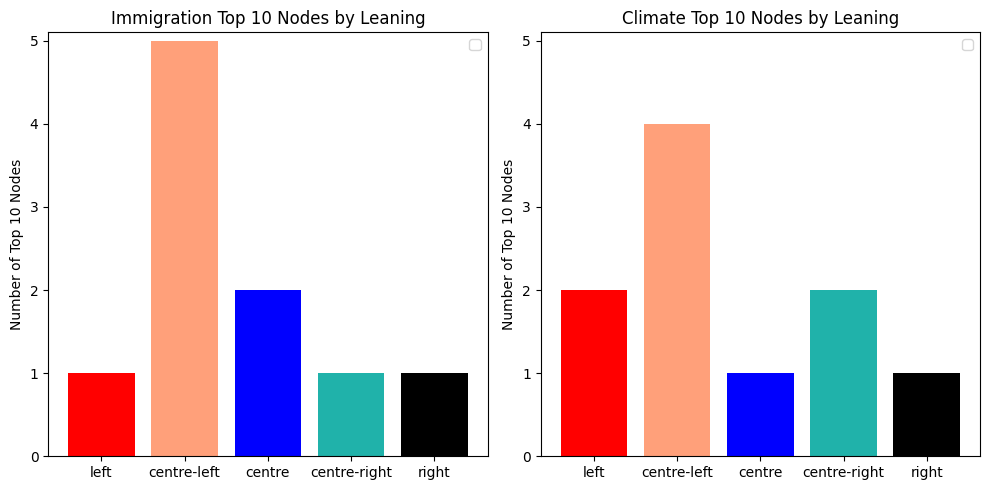

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

bar_width = 0.35
index = range(len(df.leaning))

bar1 = ax1.bar(index, df.imm_top_nodes, color=df.color)
ax1.set_ylabel('Number of Top 10 Nodes')
ax1.set_title('Immigration Top 10 Nodes by Leaning')
ax1.set_xticks(index)
ax1.set_xticklabels(df.leaning)
ax1.set_ylim(0, 5.1) 
ax1.legend()

# Plot for Climate
bar2 = ax2.bar(index, df.clim_top_nodes, color=df.color)
ax2.set_ylabel('Number of Top 10 Nodes')
ax2.set_title('Climate Top 10 Nodes by Leaning')
ax2.set_xticks(index)
ax2.set_xticklabels(df.leaning)
ax2.set_ylim(0, 5.1) 
ax2.legend()

plt.tight_layout()
plt.show()

SECOND, we plot the top pagerank value by leaning

In [124]:
imm_top_nodes = imm.sort_values(by='pageranks', ascending=False).groupby('leaning').first()['pageranks']
df['imm_top_pagerank'] = df['leaning'].map(imm_top_nodes)

clim_top_nodes = clim.sort_values(by='pageranks', ascending=False).groupby('leaning').first()['pageranks']
df['clim_top_pagerank'] = df['leaning'].map(clim_top_nodes)

In [125]:
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                '{:.4f}'.format(height),
                ha='center', va='bottom')

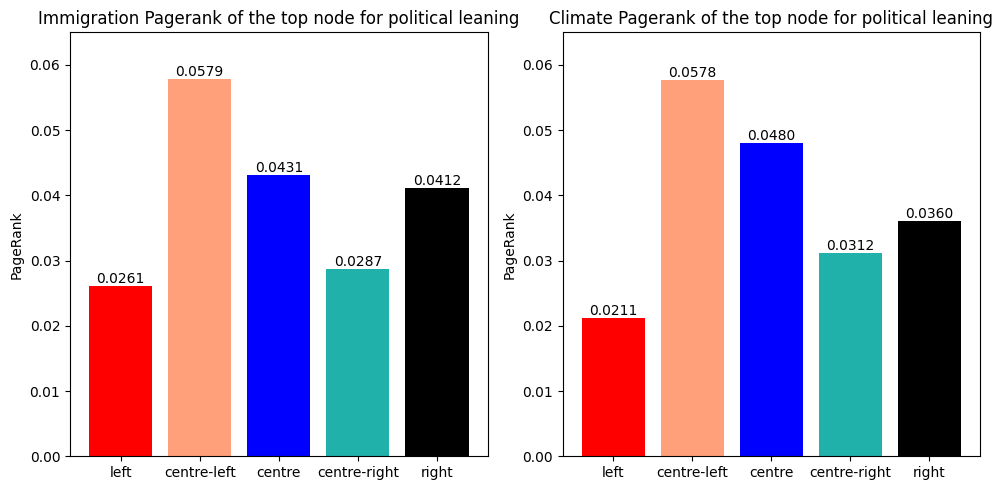

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

bar_width = 0.35
index = range(len(df.leaning))

bar1 = ax1.bar(index, df.imm_top_pagerank, color=df.color)
ax1.set_ylabel('PageRank')
ax1.set_title('Immigration Pagerank of the top node for political leaning')
ax1.set_xticks(index)
ax1.set_xticklabels(df.leaning)
ax1.set_ylim(0, 0.065) 

# Plot for Climate
bar2 = ax2.bar(index, df.clim_top_pagerank, color=df.color)
ax2.set_ylabel('PageRank')
ax2.set_title('Climate Pagerank of the top node for political leaning')
ax2.set_xticks(index)
ax2.set_xticklabels(df.leaning)
ax2.set_ylim(0, 0.065) 

add_value_labels(ax1, bar1)
add_value_labels(ax2, bar2)

plt.tight_layout()
plt.show()

THIRD, We calculate the cumulative pageranks by political leaning

In [122]:
df['imm_cum_pagerank'] = df.leaning.map(imm.groupby('leaning').sum()['pageranks'])
df['clim_cum_pagerank'] = df.leaning.map(clim.groupby('leaning').sum()['pageranks'])

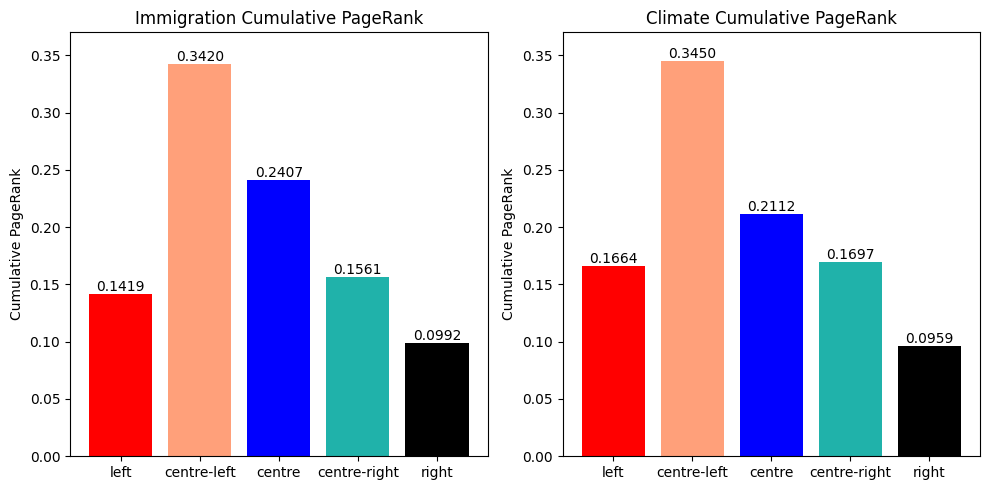

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

bar_width = 0.35
index = range(len(df.leaning))

bar1 = ax1.bar(index, df.imm_cum_pagerank, color=df.color)
ax1.set_ylabel('Cumulative PageRank')
ax1.set_title('Immigration Cumulative PageRank')
ax1.set_xticks(index)
ax1.set_xticklabels(df.leaning)
ax1.set_ylim(0, 0.37) 

# Plot for Climate
bar2 = ax2.bar(index, df.clim_cum_pagerank, color=df.color)
ax2.set_ylabel('Cumulative PageRank')
ax2.set_title('Climate Cumulative PageRank')
ax2.set_xticks(index)
ax2.set_xticklabels(df.leaning)
ax2.set_ylim(0, 0.37) 

add_value_labels(ax1, bar1)
add_value_labels(ax2, bar2)
plt.tight_layout()
plt.show()

We now turn to look into different time periods, specifically, 2017-2018-2019.

In [220]:
immigration = pd.read_csv('/Users/giovanni/masterthesis/8_Networks/3_hyphe_edgelists/1_immigration/00_IMM_dynamic_edgelist_MAIN.csv')
climate = pd.read_csv('/Users/giovanni/masterthesis/8_Networks/3_hyphe_edgelists/2_climate/00_CLIM_dynamic_edgelist_MAIN.csv')

In [229]:
year1 = immigration[immigration['monthly_period'] <=12]
year2 = immigration[(immigration['monthly_period'] >=13)&(immigration['monthly_period'] <=24)]
year3 = immigration[immigration['monthly_period'] > 24]

G1 = nx.from_pandas_edgelist(year1, 'source_label','target_label',edge_attr='count')
G2 = nx.from_pandas_edgelist(year2, 'source_label','target_label',edge_attr='count')
G3 = nx.from_pandas_edgelist(year3, 'source_label','target_label',edge_attr='count')

PR1 = nx.pagerank(G1)
PR2 = nx.pagerank(G2)
PR3 = nx.pagerank(G3)

imm['pagerank_2017'] = imm.Label.map(PR1)
imm['pagerank_2018'] = imm.Label.map(PR2)
imm['pagerank_2019'] = imm.Label.map(PR3)

In [230]:
year1 = climate[climate['monthly_period'] <=12]
year2 = climate[(climate['monthly_period'] >=13)&(climate['monthly_period'] <=24)]
year3 = climate[climate['monthly_period'] > 24]

G1 = nx.from_pandas_edgelist(year1, 'source_label','target_label',edge_attr='count')
G2 = nx.from_pandas_edgelist(year2, 'source_label','target_label',edge_attr='count')
G3 = nx.from_pandas_edgelist(year3, 'source_label','target_label',edge_attr='count')

PR1 = nx.pagerank(G1)
PR2 = nx.pagerank(G2)
PR3 = nx.pagerank(G3)

clim['pagerank_2017'] = clim.Label.map(PR1)
clim['pagerank_2018'] = clim.Label.map(PR2)
clim['pagerank_2019'] = clim.Label.map(PR3)

In [240]:
df['imm_cum_pagerank_2017'] = df.leaning.map(imm.groupby('leaning').sum()['pagerank_2017'])
df['clim_cum_pagerank_2017'] = df.leaning.map(clim.groupby('leaning').sum()['pagerank_2017'])

df['imm_cum_pagerank_2018'] = df.leaning.map(imm.groupby('leaning').sum()['pagerank_2018'])
df['clim_cum_pagerank_2018'] = df.leaning.map(clim.groupby('leaning').sum()['pagerank_2018'])

df['imm_cum_pagerank_2019'] = df.leaning.map(imm.groupby('leaning').sum()['pagerank_2019'])
df['clim_cum_pagerank_2019'] = df.leaning.map(clim.groupby('leaning').sum()['pagerank_2019'])

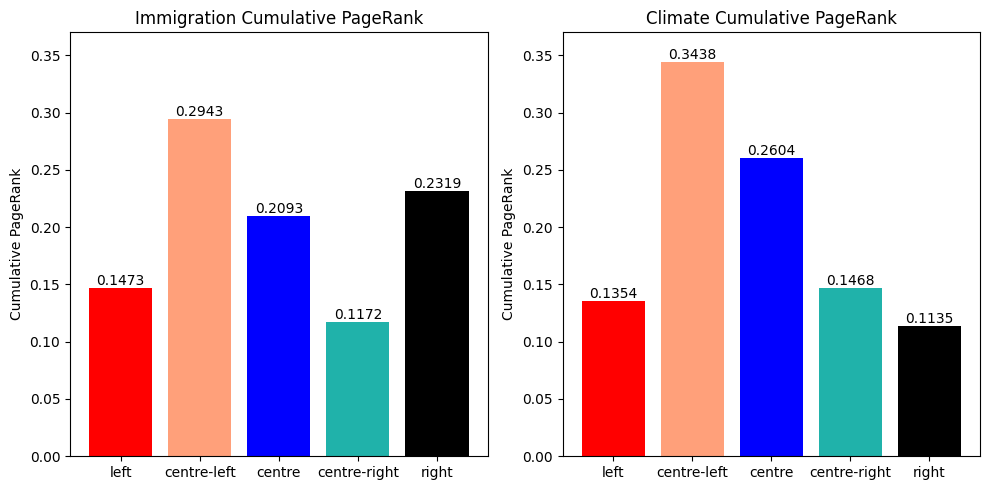

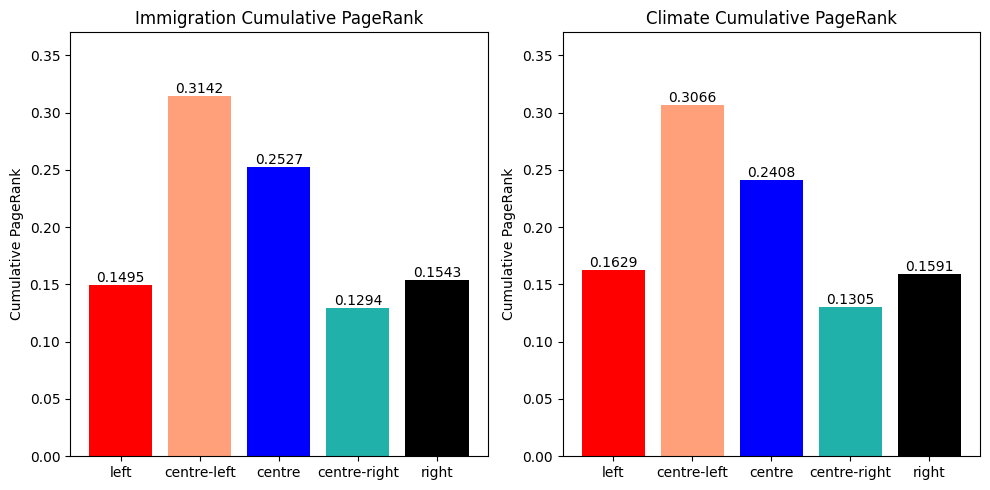

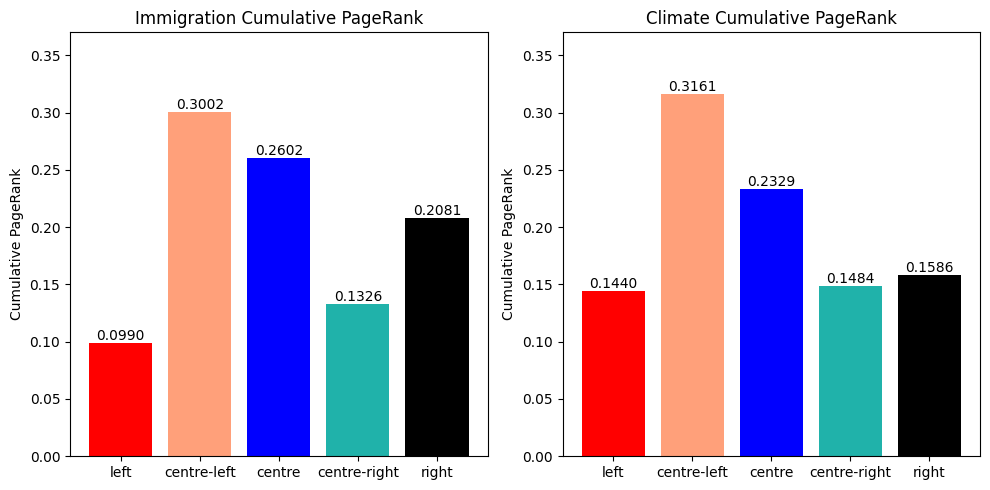

In [241]:
for year in ['2017','2018','2019']:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    bar_width = 0.35
    index = range(len(df.leaning))

    bar1 = ax1.bar(index, df[f'imm_cum_pagerank_{year}'], color=df.color)
    ax1.set_ylabel('Cumulative PageRank')
    ax1.set_title('Immigration Cumulative PageRank')
    ax1.set_xticks(index)
    ax1.set_xticklabels(df.leaning)
    ax1.set_ylim(0, 0.37) 

    # Plot for Climate
    bar2 = ax2.bar(index, df[f'clim_cum_pagerank_{year}'], color=df.color)
    ax2.set_ylabel('Cumulative PageRank')
    ax2.set_title('Climate Cumulative PageRank')
    ax2.set_xticks(index)
    ax2.set_xticklabels(df.leaning)
    ax2.set_ylim(0, 0.37) 

    add_value_labels(ax1, bar1)
    add_value_labels(ax2, bar2)
    plt.tight_layout()
    plt.show()

In [235]:
imm_top_nodes = imm.sort_values(by='pagerank_2017', ascending=False).groupby('leaning').first()['pagerank_2017']
df['imm_top_pagerank_2017'] = df['leaning'].map(imm_top_nodes)
clim_top_nodes = clim.sort_values(by='pagerank_2017', ascending=False).groupby('leaning').first()['pagerank_2017']
df['clim_top_pagerank_2017'] = df['leaning'].map(clim_top_nodes)

imm_top_nodes = imm.sort_values(by='pagerank_2018', ascending=False).groupby('leaning').first()['pagerank_2018']
df['imm_top_pagerank_2018'] = df['leaning'].map(imm_top_nodes)
clim_top_nodes = clim.sort_values(by='pagerank_2018', ascending=False).groupby('leaning').first()['pagerank_2018']
df['clim_top_pagerank_2018'] = df['leaning'].map(clim_top_nodes)

imm_top_nodes = imm.sort_values(by='pagerank_2019', ascending=False).groupby('leaning').first()['pagerank_2019']
df['imm_top_pagerank_2019'] = df['leaning'].map(imm_top_nodes)
clim_top_nodes = clim.sort_values(by='pagerank_2019', ascending=False).groupby('leaning').first()['pagerank_2019']
df['clim_top_pagerank_2019'] = df['leaning'].map(clim_top_nodes)


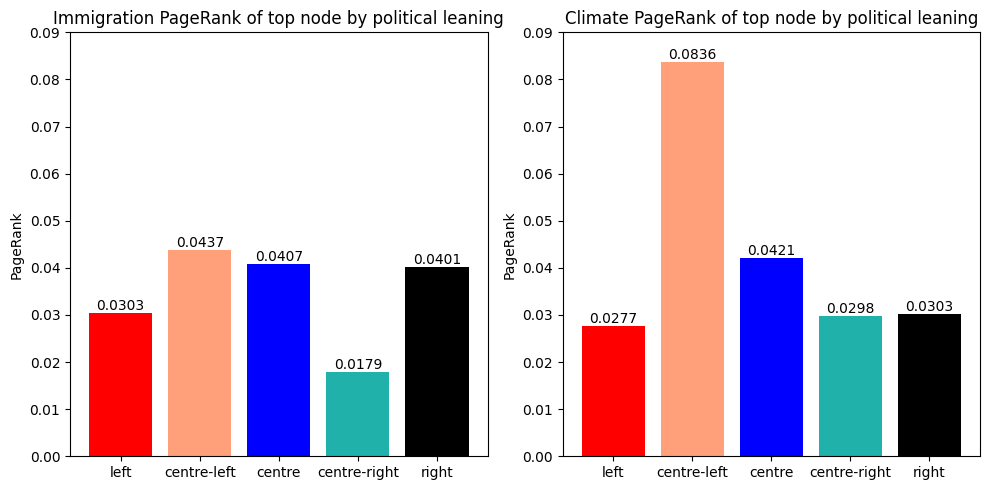

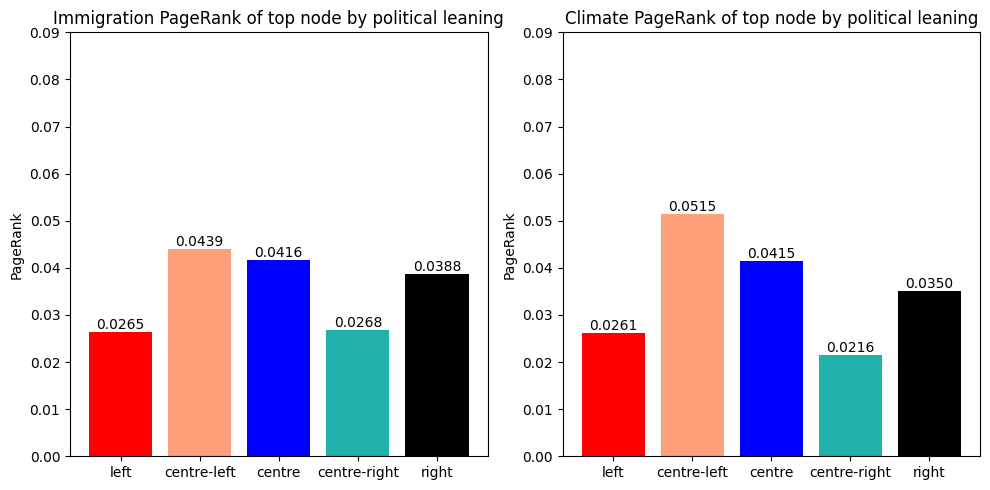

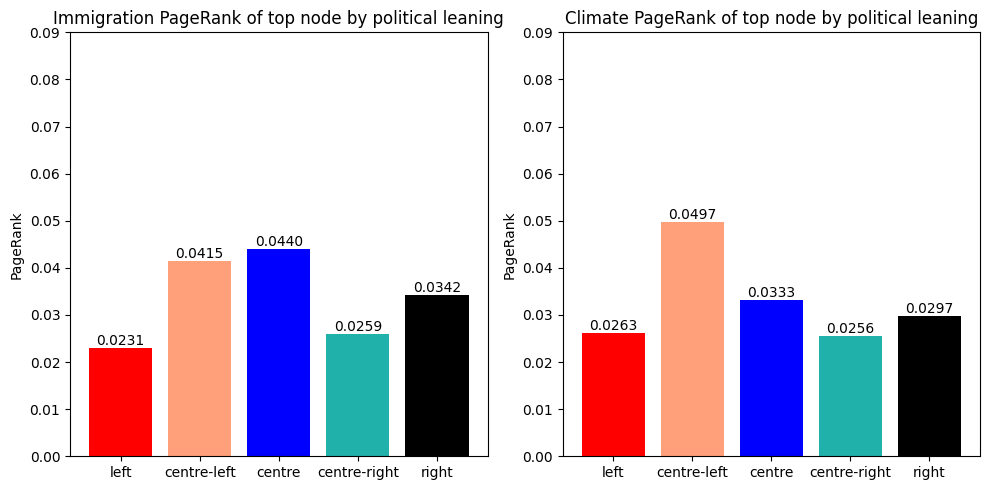

In [239]:
for year in ['2017','2018','2019']:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    bar_width = 0.35
    index = range(len(df.leaning))

    bar1 = ax1.bar(index, df[f'imm_top_pagerank_{year}'], color=df.color)
    ax1.set_ylabel('PageRank')
    ax1.set_title('Immigration PageRank of top node by political leaning')
    ax1.set_xticks(index)
    ax1.set_xticklabels(df.leaning)
    ax1.set_ylim(0, 0.09) 

    # Plot for Climate
    bar2 = ax2.bar(index, df[f'clim_top_pagerank_{year}'], color=df.color)
    ax2.set_ylabel('PageRank')
    ax2.set_title('Climate PageRank of top node by political leaning')
    ax2.set_xticks(index)
    ax2.set_xticklabels(df.leaning)
    ax2.set_ylim(0, 0.09) 

    add_value_labels(ax1, bar1)
    add_value_labels(ax2, bar2)
    plt.tight_layout()
    plt.show()

We now look at the leaning composition by modularity class

<Figure size 1200x800 with 0 Axes>

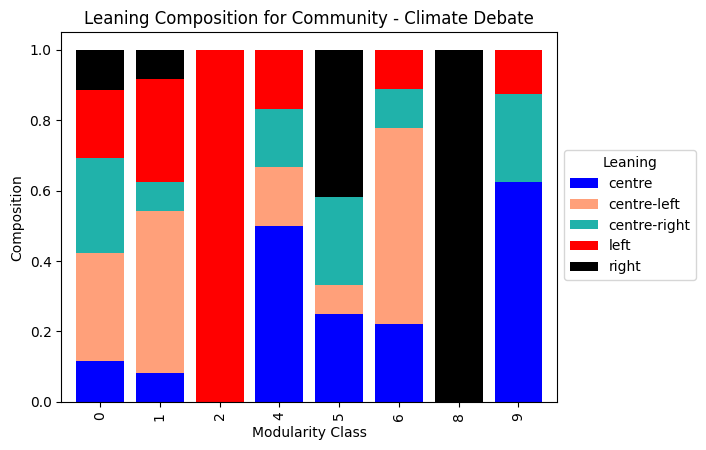

In [269]:
values = clim.groupby(['modularity_class', 'leaning']).size().unstack(fill_value=0)
composition = values.div(values.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
composition.plot(kind='bar', stacked=True, color=[colors.get(x, 'black') for x in composition.columns], width = 0.8)
plt.xlabel('Modularity Class')
plt.ylabel('Composition')
plt.title('Leaning Composition for Community - Climate Debate')
plt.legend(title='Leaning', bbox_to_anchor=(1, 0.7))
plt.show()

<Figure size 1200x800 with 0 Axes>

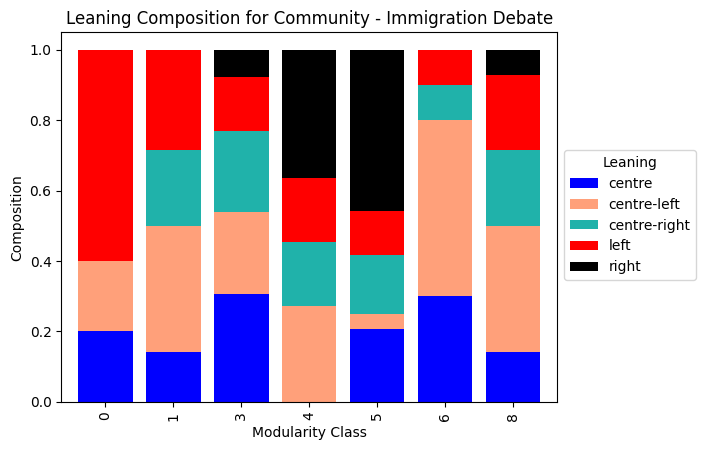

In [270]:
values = imm.groupby(['modularity_class', 'leaning']).size().unstack(fill_value=0)
composition = values.div(values.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
composition.plot(kind='bar', stacked=True, color=[colors.get(x, 'black') for x in composition.columns], width = 0.8)
plt.xlabel('Modularity Class')
plt.ylabel('Composition')
plt.title('Leaning Composition for Community - Immigration Debate')
plt.legend(title='Leaning', bbox_to_anchor=(1, 0.7))
plt.show()

We use this line to investigate all the different communities singularly.

In [294]:
imm[imm.modularity_class == 5][['leaning','Label','media_type','pageranks']].sort_values(by='pageranks', ascending=False)

,leaning,Label,media_type,pageranks
9,right,lefigaro.fr,Counter-Informational Space,0.041191
8,centre-right,france24.com,Mainstream Media,0.020673
31,centre,lejdd.fr,Mainstream Media,0.018335
52,centre,rfi.fr,Mainstream Media,0.016963
25,centre,lexpress.fr,Mainstream Media,0.010657
32,centre-right,rtl.fr,Mainstream Media,0.010058
68,centre,euronews.com,Mainstream Media,0.006632
14,right,valeursactuelles.com,Opinion Journalism,0.006428
41,right,causeur.fr,Opinion Journalism,0.005796
77,centre-right,sudradio.fr,NaN,0.005366


This line helps us summarize the pagerank and the leaning composition of each class which we visualize below.

In [298]:
imm[['modularity_class', 'leaning','pageranks']].groupby(['modularity_class', 'leaning']).sum()

pageranks
modularity_class leaning                
0                centre         0.009437
                 centre-left    0.025814
                 left           0.033976
1                centre         0.056542
                 centre-left    0.125285
                 centre-right   0.024377
                 left           0.055126
3                centre         0.066617
                 centre-left    0.030321
                 centre-right   0.048930
                 left           0.008868
                 right          0.003480
4                centre-left    0.020924
                 centre-right   0.016008
                 left           0.005736
                 right          0.012974
5                centre         0.056878
                 centre-left    0.002868
                 centre-right   0.039794
                 left           0.010023
                 right          0.079875
6                centre         0.024131
                 centre-left    0.030851
                 centre-right   0.006657
                 left           0.007737
8                centre         0.027111
                 centre-left    0.105972
                 centre-right   0.020285
                 left           0.020462
                 right          0.002868

<Figure size 1200x800 with 0 Axes>

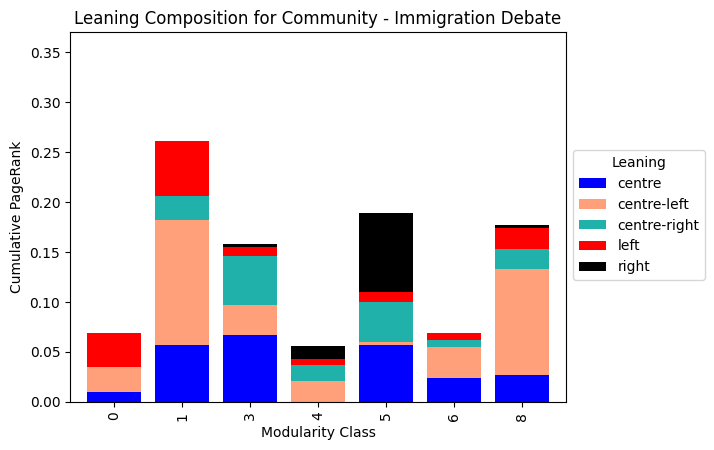

In [315]:
values = imm.groupby(['modularity_class', 'leaning']).pageranks.sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
values.plot(kind='bar', stacked=True, color=[colors.get(x, 'black') for x in composition.columns], width = 0.8)
plt.xlabel('Modularity Class')
plt.ylabel('Cumulative PageRank')
plt.ylim(0,0.37)
plt.title('Leaning Composition for Community - Immigration Debate')
plt.legend(title='Leaning', bbox_to_anchor=(1, 0.7))
plt.show()

<Figure size 1200x800 with 0 Axes>

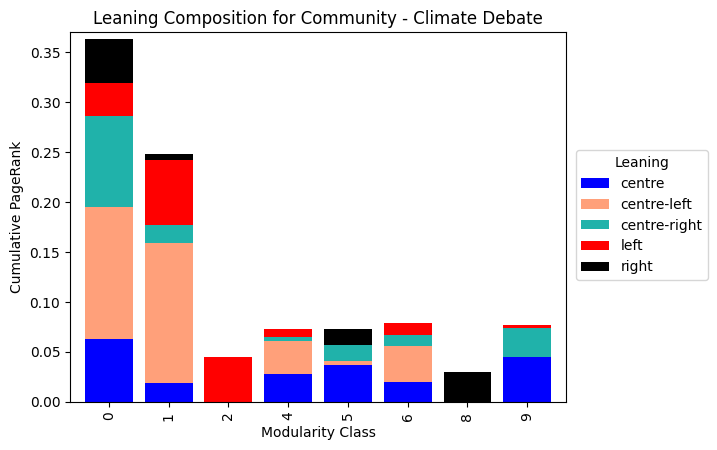

In [320]:
values = clim.groupby(['modularity_class', 'leaning']).pageranks.sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
values.plot(kind='bar', stacked=True, color=[colors.get(x, 'black') for x in composition.columns], width = 0.8)
plt.xlabel('Modularity Class')
plt.ylabel('Cumulative PageRank')
plt.ylim(0,0.37)
plt.title('Leaning Composition for Community - Climate Debate')
plt.legend(title='Leaning', bbox_to_anchor=(1.3, 0.7))
plt.show()

Investigate the pagerank values

In [279]:
imm.groupby(['modularity_class']).pageranks.sum()



modularity_class
0    0.069227
1    0.261330
3    0.158216
4    0.055642
5    0.189438
6    0.069376
8    0.176698
Name: pageranks, dtype: float64

Calculate mean leaning of each community. 

In [287]:
clim.groupby(['modularity_class']).audience_mean_lr.mean()

modularity_class
0    6.264918
1    5.628254
2    4.150570
4    6.253914
5    7.620156
6    5.841836
8    9.212176
9    6.039913
Name: audience_mean_lr, dtype: float64